In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
df = pd.read_csv("final_data.csv")

In [11]:
# Count of rows and columns
df.shape

(3492, 16)

In [12]:
# Type of Columns
df.dtypes

itemID             object
title              object
branding           object
rating             object
count_rating      float64
current_price     float64
shipping           object
image_url          object
max_resolution     object
displayport        object
hdmi               object
directx            object
model              object
int_shipping      float64
total_price       float64
detail_product     object
dtype: object

                             branding  Count
27                                MSI    632
17                           GIGABYTE    569
5                                ASUS    547
16                               EVGA    389
33             PNY Technologies, Inc.    250
31                             NVIDIA    202
39                      Sapphire Tech    174
45                              ZOTAC    144
44                                XFX     98
18                                 HP     67
13                               DELL     60
48                             yeston     46
35                         PowerColor     45
4                              ASRock     41
29                           Mannajue     27
43                          VisionTek     27
1                                 AMD     23
25                             Lenovo     18
8                    BFG Technologies     14
0                              51Risc     13
26                             MAXSUN     10
40  Shenzh

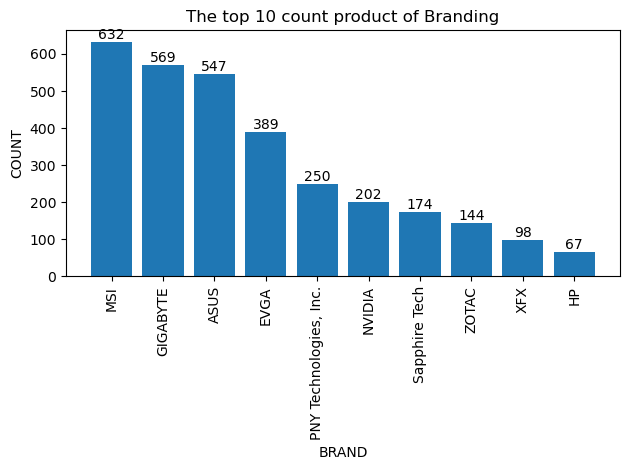

In [102]:
# Các hãng đang cung cấp Card đồ họa, số lượng sản phẩm của mỗi hãng.
data_count = df.groupby(['branding']).size().reset_index(name='Count').sort_values('Count', ascending=False)
print(data_count)
top10_data_count = data_count.head(10)
top10_data_count
plt.bar(top10_data_count['branding'], top10_data_count['Count'])
plt.xlabel('BRAND')
plt.ylabel('COUNT')
plt.title('The top 10 count product of Branding')
plt.xticks(rotation=90)  # Quay dọc tất cả các nhãn trục x
plt.tight_layout()

# Hiển thị con số cụ thể trên đồ thị
for i, count in enumerate(top10_data_count['Count']):
    plt.annotate(str(count), (i, count), ha='center', va='bottom')

plt.show()

   price_range  COUNT
0        0-500   1856
1     500-1000   1126
2    1000-1500    295
3    1500-2000    155
4    2000-2500     45
5    2500-3000      5
6    3000-3500      3
7    3500-4000      0
8    4000-4500      0
9    4500-5000      2
10   5000-5500      4
11       5500+      1


<function matplotlib.pyplot.show(close=None, block=None)>

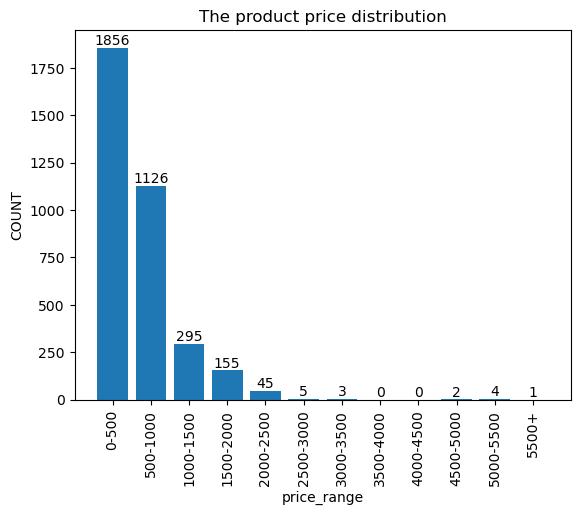

In [101]:
# 2. phân bố giá của các sản phẩm (Mức giá phổ biến là bao nhiêu)
df_distribute_price = df[['itemID','total_price']]
data = df_distribute_price.groupby(['total_price']).size().reset_index(name='COUNT')

# Chia theo mức giá trong khoảng
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, float('inf')]
labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000-3500',\
          '3500-4000', '4000-4500', '4500-5000', '5000-5500', '5500+']
df['price_range'] = pd.cut(df_distribute_price['total_price'], bins=bins, labels=labels)

# Groupby và đếm số lượng
grouped = df.groupby('price_range').size().reset_index(name='COUNT')
print(grouped)

plt.bar(grouped['price_range'], grouped['COUNT'])
plt.xlabel('price_range')
plt.ylabel('COUNT')
plt.title('The product price distribution')
plt.xticks(rotation=90)

# Hiển thị con số cụ thể trên đồ thị
for i, count in enumerate(grouped['COUNT']):
    plt.annotate(str(count), (i, count), ha='center', va='bottom')

plt.show


0       GIGABYTE
1       GIGABYTE
2         Peladn
3       GIGABYTE
4            MSI
          ...   
3487         AMD
3488      NVIDIA
3489          HP
3490         AMD
3491         AMD
Name: branding, Length: 3492, dtype: object
0        859.99
1       1188.93
2        118.00
3       1149.99
4        289.99
         ...   
3487     485.00
3488     389.00
3489    1699.00
3490     338.00
3491     338.00
Name: total_price, Length: 3492, dtype: float64


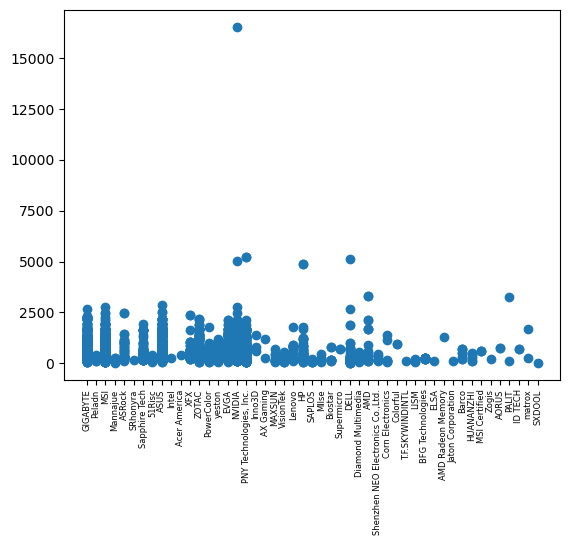

In [58]:
# 3. Phân bố giá sản phẩm theo hãng
x = df['branding']
y = df['total_price']
plt.scatter(x, y)
plt.xticks(rotation=90,fontsize=6)

print(x)
print(y)

626     rated 1 out of 5
1629    rated 1 out of 5
2655    rated 1 out of 5
1018    rated 1 out of 5
3427    rated 1 out of 5
              ...       
1271    rated 5 out of 5
1245    rated 5 out of 5
1236    rated 5 out of 5
2677    rated 5 out of 5
1414    rated 5 out of 5
Name: rating, Length: 1801, dtype: object
626      199.99
1629    1079.00
2655     137.60
1018      97.71
3427     514.99
         ...   
1271     239.00
1245    1165.00
1236     321.37
2677     865.00
1414     299.00
Name: total_price, Length: 1801, dtype: float64


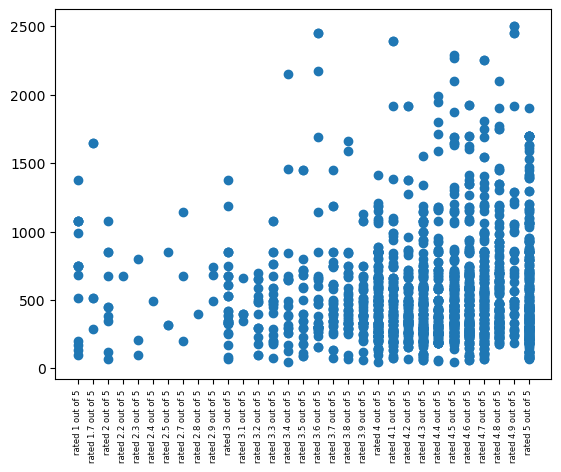

In [59]:
# 4. Biểu diễn mối liên hệ giữa giá sản phẩm và rating của người dùng
data_rating = df.loc[df['rating'].notnull()].sort_values('rating')
x = data_rating['rating']
y = data_rating['total_price']
plt.scatter(x, y)
plt.xticks(rotation=90,fontsize=6)

print(x)
print(y)